<a href="https://www.kaggle.com/code/gauravkandwal/optimizing-logistic-regression-with-pca-algorithm?scriptVersionId=122128317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# We will train a model using whole dataset first then with reduced dimensions and lastly with our beloved PCA. 

Let's start by importing our main libraries first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will now import a dataset which is already there inside our sklearn package

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer= load_breast_cancer() #assigning our own variable to the dataset

In [4]:
#Let's load the dataset in a pandas dataframe and mark out our dependent variables and target variable

df = pd.DataFrame(breast_cancer.data, 
                  columns = breast_cancer.feature_names)


df['diagnosis'] = breast_cancer.target
df                


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Let's check the shape of our dataframe (rows and columns) and check the firsd 5 rows using .head() method

In [5]:
df.shape

(569, 31)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
print(breast_cancer.feature_names) #Checking our column names



['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(breast_cancer.target)
print(breast_cancer.target_names)
print(np.array(np.unique(breast_cancer.target, return_counts = True)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

This output tells me that our target variable is binary type where 0 means malignant and 1 means benign (That means benign tumour and malignant tumour)

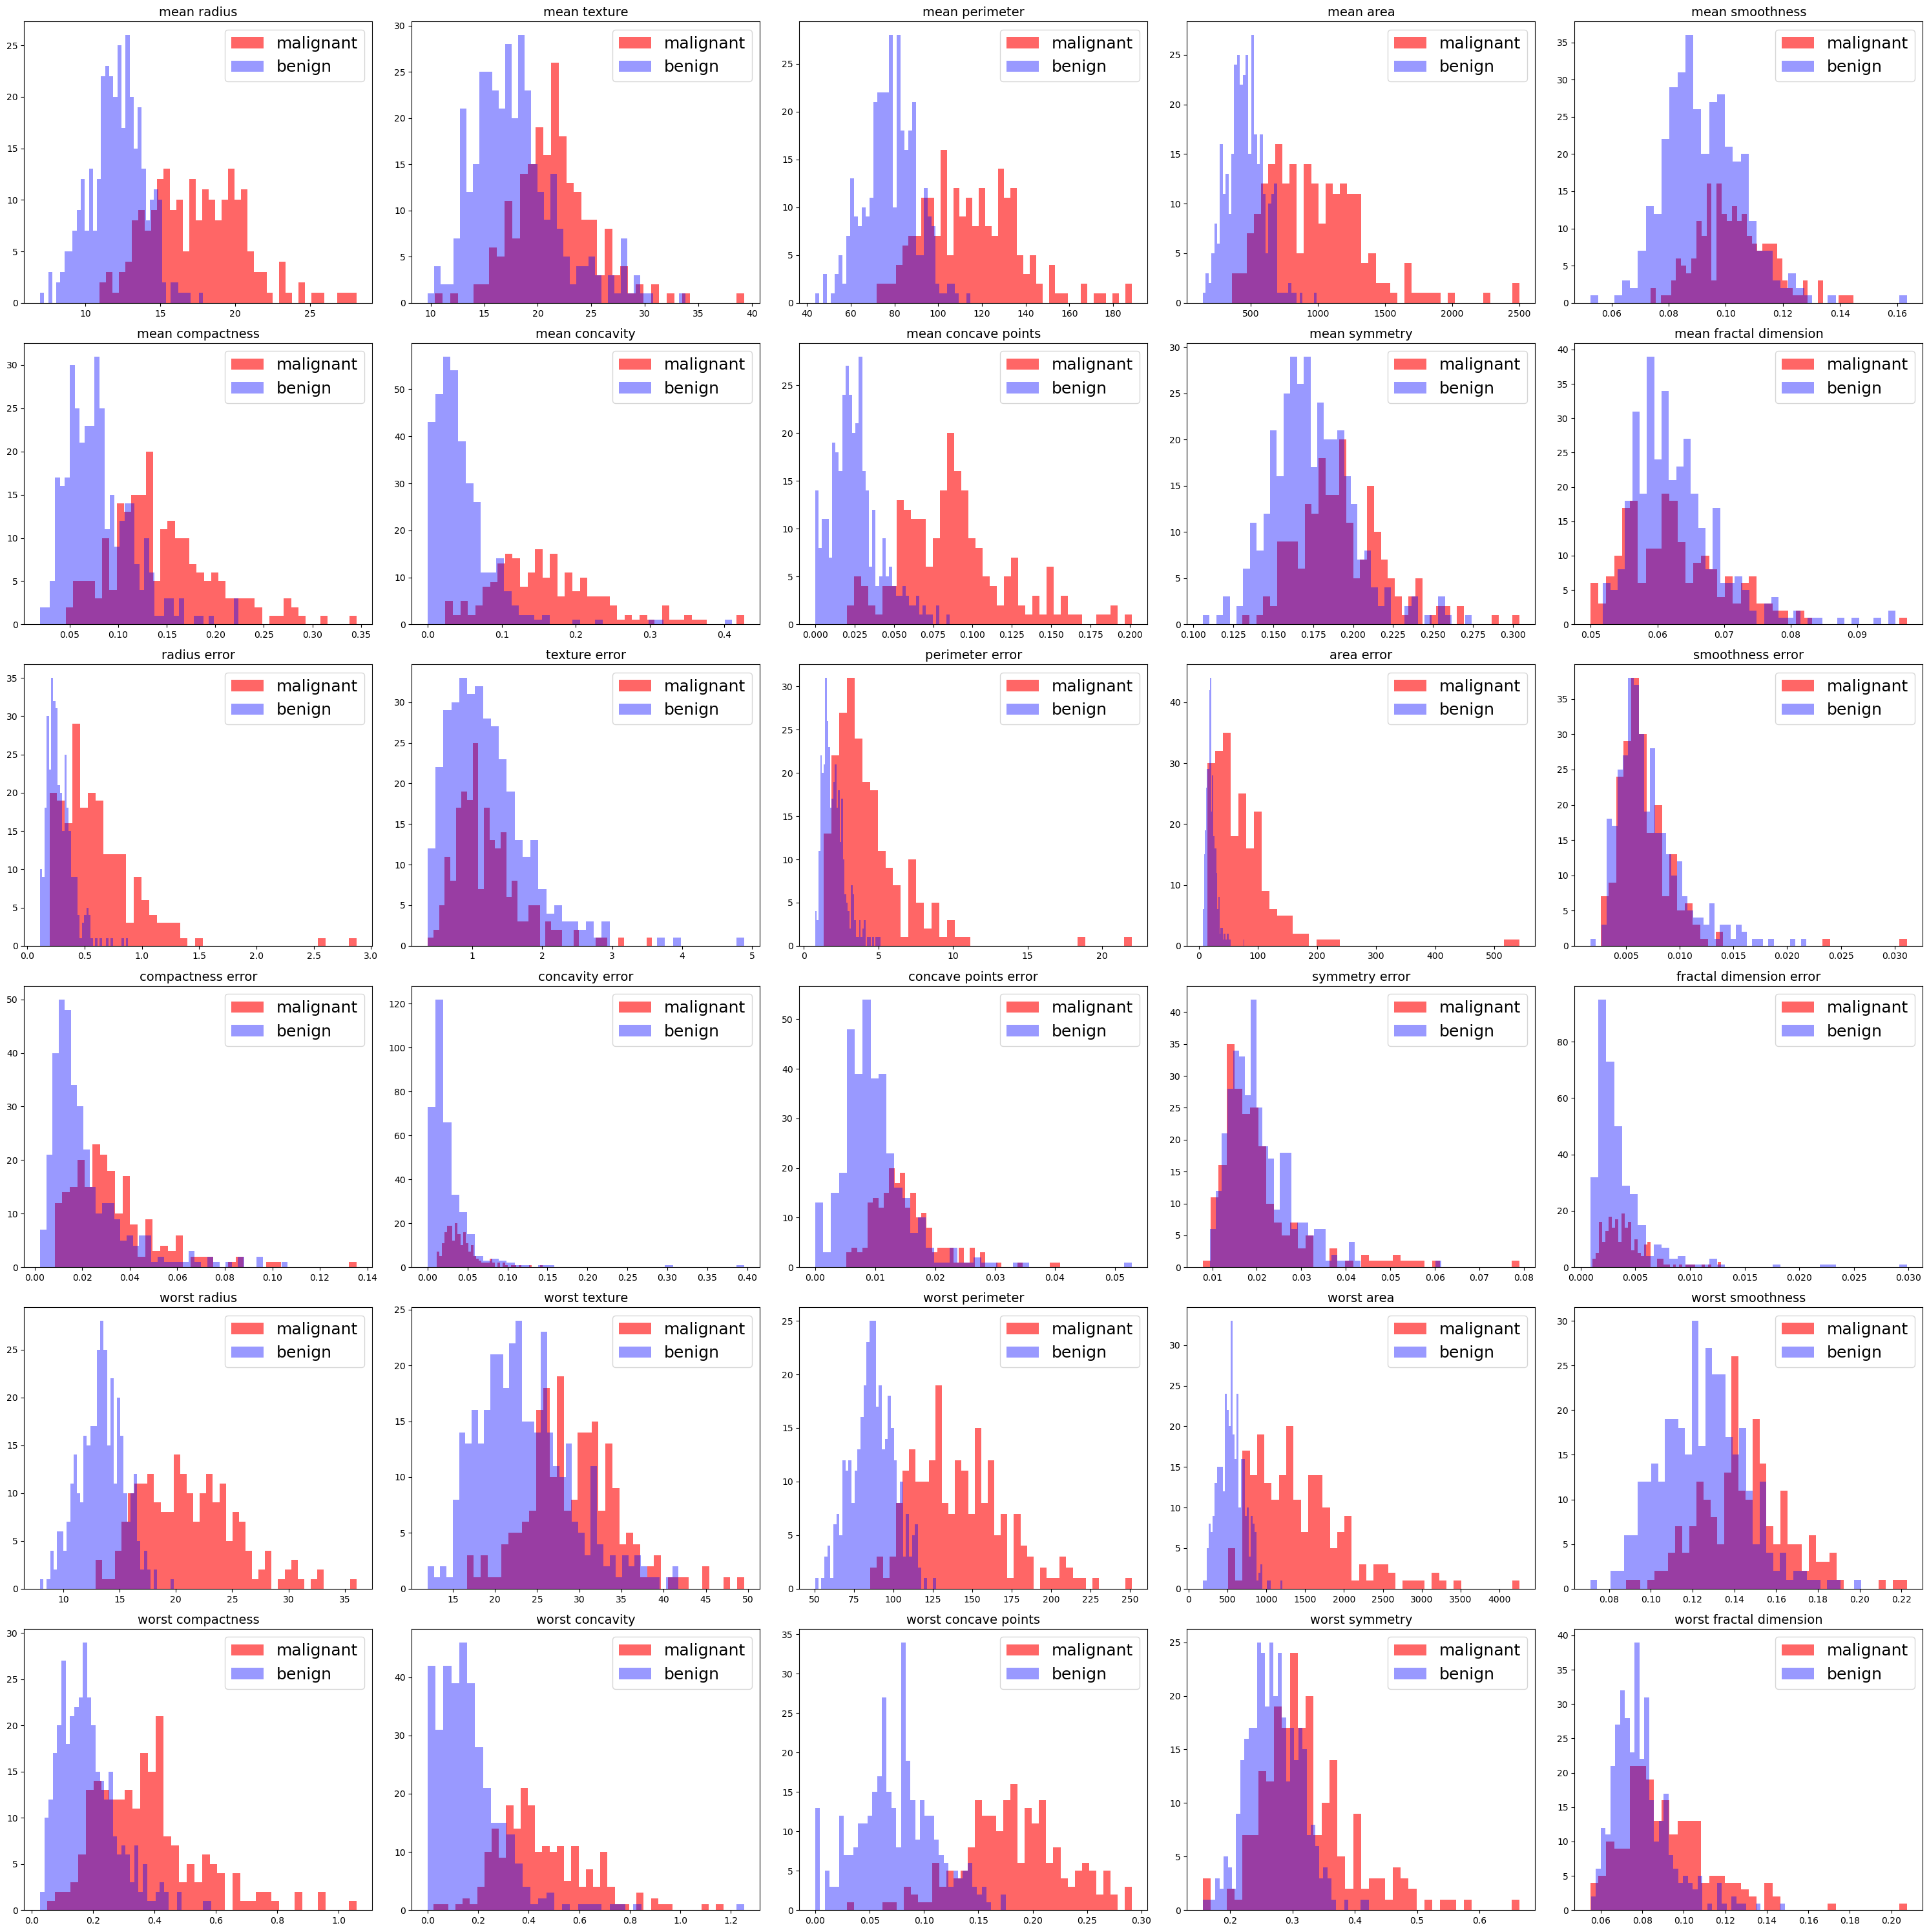

In [9]:
_, axes = plt.subplots(6, 5, figsize = (30,30))

malignant = breast_cancer.data[breast_cancer.target == 0]
benign = breast_cancer.data[breast_cancer.target == 1]

ax = np.ravel(axes, order = 'C')
for i in range (30):
    bins = 40

    ax[i].hist(malignant[:, i], bins = bins, color ='r', alpha =.6)
    ax[i].hist(benign[:, i], bins = bins, color = 'b', alpha = .4)
    
    ax[i].set_title(breast_cancer.feature_names[i], fontsize = 14)
    ax[i].legend(['malignant', 'benign'], loc = 'best', fontsize = 18)

plt.tight_layout()
plt.show()
    
    

The histograms of those features where malignant part is NOT overlapping much with benign part are the features that affect the target the most 

First we will try to train our model with our entire dataset and see what we get. To do so we need to scale our data since oue current features are in different units (parameter, area, error etc.) Scaling is a statistical method done to fit our values inside a normal distribution.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(df)

In [14]:
scaled_data_df = pd.DataFrame(scaled_data) #converting the scaled data into a dataframe since it is a numpy array right now

In [15]:
scaled_data_df #Let's see our scaled data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

random_state = 12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state = random_state)
 
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train, Y_train)
log_reg.score(X_test, Y_test)

0.9239766081871345

94% is our accuracy


>Let's try to train our model with reduced number of feature. This process is called dimensionality reduction. In order to do so we need to have correlated features in our data.

In [17]:
#Let's create a correlation matrix using .corr() method on our dataframe

df_corr = df.corr()['diagnosis'].abs().sort_values(ascending = False)
df_corr



diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [18]:
#Let's get all those features that have atleast 0.6 in terms of correlation coefficient with our target variable

features = df_corr[df_corr > 0.6].index.to_list()[1:]
features

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

Now we will use the linear regression model to further find multi-colinearity amongst these 8 features (reduced from initial 30). It will further help us in reducing dimensions.

In [19]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):
    
    vif, tolerance = {}, {}
    
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]

        r2 = LinearRegression().fit(X,y).score(X,y)
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
        
    return pd.DataFrame({'VIF': vif, 'Tolerance':tolerance})

calculate_vif(df, features)
        
            

,VIF,Tolerance
worst concave points,17.130560,0.058375
worst perimeter,204.329679,0.004894
mean concave points,34.546872,0.028946
worst radius,391.471018,0.002554
mean perimeter,1519.882563,0.000658
worst area,169.931222,0.005885
mean radius,1606.575820,0.000622
mean area,200.004550,0.005000
mean concavity,30.806430,0.032461
worst concavity,14.417687,0.069359


In [20]:
features = ['worst concavity', 'worst concave points',  'mean concavity']  

#We will have to do some trials here to find least no of features that have VIF value of <= 5 and then train our model with these features

calculate_vif(df, features)

,VIF,Tolerance
worst concavity,5.429548,0.184177
worst concave points,4.593203,0.217713
mean concavity,5.642215,0.177235


Let's train our model again

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.loc[:, features]
Y = df.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state = random_state)
 
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg.score(X_test, Y_test)

0.8538011695906432

Oh uh! Our accuracy dipped from 94% to 85%


It's time to call the avenger called PCA. Let's summon the PCA from our Sklearn package.

In [22]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
pca.fit(scaled_data)

PCA()

In [23]:
print("Variances (Percentage):")
print()
print(pca.explained_variance_ratio_.cumsum() * 100)


Variances (Percentage):

[ 44.89603531  63.36813909  72.55152452  78.99785725  84.34972363
  88.2449104   90.45368186  92.01773166  93.3625537   94.49446866
  95.47787316  96.41653717  97.25850628  97.94326612  98.42254413
  98.70693949  98.96455295  99.1549895   99.32099566  99.47653097
  99.57558349  99.67083075  99.75903935  99.83737352  99.89399357
  99.94390756  99.96989512  99.99205555  99.99717963  99.99957215
 100.        ]


Above output says that 1st principal component captures ≈ 45% of variance, first two PCs together capture 63% variance, first three PCs together capture 72.5% and so on..
There are a total of 30 PCS but we won't need all of them, 85% to 90% of variance should be good enough. This much we can get from first 6 PCs that capture 88% of variance. 


In [24]:
pca = PCA(n_components = 6)

In [25]:
pca.fit(scaled_data)

PCA(n_components=6)

In [26]:
x_pca = pca.transform(scaled_data)

In [27]:
x_pca.shape

(569, 6)

In [28]:
x_pca

array([[ 9.22577011,  2.11619563, -0.94810916, -3.6957777 , -1.25627961,
         1.41911714],
       [ 2.6558016 , -3.78477586, -0.50282496, -1.12393837,  0.55110722,
         0.01927246],
       [ 5.89249212, -1.00557896, -0.48714897, -0.9424863 , -0.19171047,
         0.54133273],
       ...,
       [ 1.53007727, -1.95887148,  0.46571815,  2.10448113,  1.82011267,
        -0.54601519],
       [10.40500789,  1.84907792, -1.77932757,  2.16346333,  0.20160899,
         0.59163116],
       [-5.50486158, -0.76634841,  1.36862307,  2.38604945, -0.14075433,
         1.61771263]])

In [29]:
new_features = pd.DataFrame(x_pca, columns =['1', '2', '3', '4', '5', '6'])
print("\nPandas DataFrame: ")
new_features #converting numpy array into dataframe again


Pandas DataFrame: 


,1,2,3,4,5,6
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019272
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191710,0.541333
3,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062748
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428
...,...,...,...,...,...,...
564,6.593983,-3.454947,2.570876,-1.152905,-0.129840,-2.377276
565,4.024833,-3.556006,2.047373,2.568539,-0.434088,-0.243029
566,1.530077,-1.958871,0.465718,2.104481,1.820113,-0.546015
567,10.405008,1.849078,-1.779328,2.163463,0.201609,0.591631


You know what time it is. Time to train our Logistic Regression model with our 6 principal components instead of the whole data.
Here we go..

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [31]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()

log_regress_model = Pipeline([('std scaler', _sc), ('pca', _pca), ('regressor', _model)])

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle= True, random_state= random_state)
log_regress_model.fit(X_train, Y_train)

Pipeline(steps=[('std scaler', StandardScaler()), ('pca', PCA()),
                ('regressor', LogisticRegression())])

In [33]:
log_regress_model.score(X_test, Y_test)

0.9298245614035088


92% accuracy with 6 abstract features extracted from PCA. It's lower than 94% but remember that model was trained on 30 features about 5 times more in number. That means our model with PCA optimization is lightweight. So not much to lose here.

Hope you enjoyed it. Please leave your comments/suggestions. 